# Churn Prediction in Telecoms

In [1]:
import pandas as pd
data = pd.read_csv('Churn in Telecoms dataset.csv')
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Separate the target variable (y) and features (X)
target_variable = 'churn'
X = data.drop(columns=[target_variable])
y = data[target_variable]

# Encode categorical variables if needed (e.g., 'international plan' and 'voice mail plan')
X = pd.get_dummies(X, drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Get feature importances from the trained Random Forest model
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Select the most important columns for data modeling (e.g., top 6)
most_important_columns = sorted_feature_importances[:6].index.tolist()
most_important_columns

['total day minutes',
 'total day charge',
 'customer service calls',
 'international plan_yes',
 'total eve charge',
 'total eve minutes']

In [4]:
# Create a list of relevant numeric columns (excluding the 'churn' column)
relevant_columns = ['total day minutes', 'total day charge', 'customer service calls',
                            'total eve charge', 'total eve minutes', 'international plan']

# Select only the relevant numeric columns and the target variable 'churn'
data2 = data[relevant_columns + ['churn']]

#display first five columns
data2.head()

,total day minutes,total day charge,customer service calls,total eve charge,total eve minutes,international plan,churn
0,265.1,45.07,1,16.78,197.4,no,False
1,161.6,27.47,1,16.62,195.5,no,False
2,243.4,41.38,0,10.30,121.2,no,False
3,299.4,50.90,2,5.26,61.9,yes,False
4,166.7,28.34,3,12.61,148.3,yes,False


In [5]:
data['churn'].value_counts()

churn
False    2850
True      483
Name: count, dtype: int64

In [6]:
#inspect the data variables
data2.describe()

,total day minutes,total day charge,customer service calls,total eve charge,total eve minutes
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,179.775098,30.562307,1.562856,17.083540,200.980348
std,54.467389,9.259435,1.315491,4.310668,50.713844
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,143.700000,24.430000,1.000000,14.160000,166.600000
50%,179.400000,30.500000,1.000000,17.120000,201.400000
75%,216.400000,36.790000,2.000000,20.000000,235.300000
max,350.800000,59.640000,9.000000,30.910000,363.700000


## Data Cleaning

In [7]:
# Convert 'international plan' to boolean type
data2['international plan'] = data2['international plan'].map({'yes': True, 'no': False})
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   total day minutes       3333 non-null   float64
 1   total day charge        3333 non-null   float64
 2   customer service calls  3333 non-null   int64  
 3   total eve charge        3333 non-null   float64
 4   total eve minutes       3333 non-null   float64
 5   international plan      3333 non-null   bool   
 6   churn                   3333 non-null   bool   
dtypes: bool(2), float64(4), int64(1)
memory usage: 136.8 KB


C:\Users\Administrator\AppData\Local\Temp\ipykernel_10132\108688473.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['international plan'] = data2['international plan'].map({'yes': True, 'no': False})


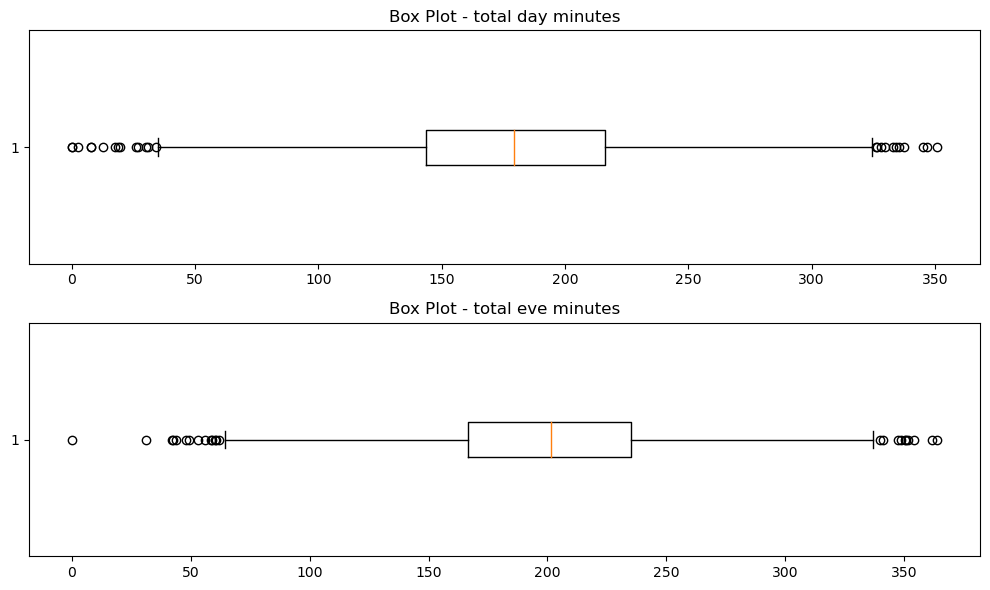

In [8]:
# Check for outliers in "Year" and "Fatalities" columns using box plots
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.boxplot(data2['total day minutes'], vert=False)
plt.title("Box Plot - total day minutes")
plt.subplot(2, 1, 2)
plt.boxplot(data2['total eve minutes'], vert=False)
plt.title("Box Plot - total eve minutes")
plt.tight_layout()
plt.show()

In [9]:
#eliminate extreme values

# Calculate the IQR for 'total day minutes' and 'total eve minutes'
Q1_day = data2['total day minutes'].quantile(0.25)
Q3_day = data2['total day minutes'].quantile(0.75)
IQR_day = Q3_day - Q1_day

Q1_eve = data2['total eve minutes'].quantile(0.25)
Q3_eve = data2['total eve minutes'].quantile(0.75)
IQR_eve = Q3_eve - Q1_eve

# Define the upper and lower bounds for outlier detection
lower_bound_day = Q1_day - 1.5 * IQR_day
upper_bound_day = Q3_day + 1.5 * IQR_day

lower_bound_eve = Q1_eve - 1.5 * IQR_eve
upper_bound_eve = Q3_eve + 1.5 * IQR_eve

# Eliminate extreme values for 'total day minutes' and 'total eve minutes'
data2 = data2.loc[(data2['total day minutes'] >= lower_bound_day) & (data2['total day minutes'] <= upper_bound_day)]
data2 = data2.loc[(data2['total eve minutes'] >= lower_bound_eve) & (data2['total eve minutes'] <= upper_bound_eve)]

In [10]:
data2.describe()

,total day minutes,total day charge,customer service calls,total eve charge,total eve minutes
count,3284.000000,3284.000000,3284.000000,3284.000000,3284.000000
mean,179.881303,30.580362,1.568210,17.100585,201.180816
std,52.863533,8.986756,1.316467,4.184184,49.225707
min,35.100000,5.970000,0.000000,5.470000,64.300000
25%,143.975000,24.475000,1.000000,14.200000,167.100000
50%,179.400000,30.500000,1.000000,17.120000,201.400000
75%,216.125000,36.742500,2.000000,19.982500,235.125000
max,324.700000,55.200000,9.000000,28.650000,337.100000


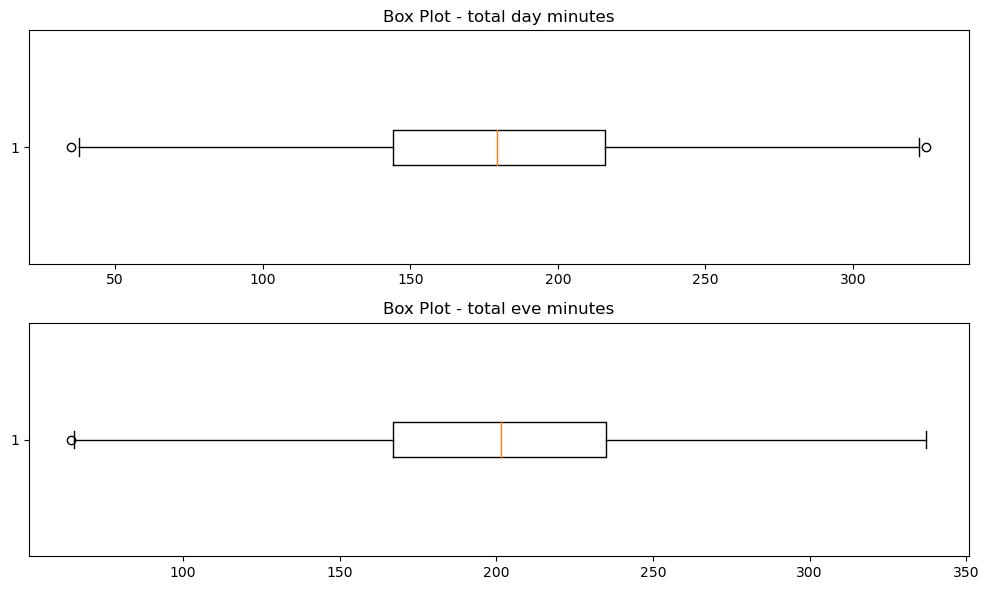

In [11]:
#recheck for outliers
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.boxplot(data2['total day minutes'], vert=False)
plt.title("Box Plot - total day minutes")
plt.subplot(2, 1, 2)
plt.boxplot(data2['total eve minutes'], vert=False)
plt.title("Box Plot - total eve minutes")
plt.tight_layout()
plt.show()

## Feature Engineering

Perform one Hot Encoding on 'churn' and 'international plan' columns to convert into numeric binary columns

In [15]:
# Apply One-Hot Encoding to 'international plan' and 'churn' columns
data2_encoded = pd.get_dummies(data2, columns=['international plan', 'churn'], drop_first=True)

# Convert 'international plan_True' and 'churn_True' to 0 and 1, respectively
data2_encoded['international plan_True'] = data2_encoded['international plan_True'].astype(int)
data2_encoded['churn_True'] = data2_encoded['churn_True'].astype(int)
data2_encoded.head()

,total day minutes,total day charge,customer service calls,total eve charge,total eve minutes,international plan_True,churn_True
0,265.1,45.07,1,16.78,197.4,0,0
1,161.6,27.47,1,16.62,195.5,0,0
2,243.4,41.38,0,10.30,121.2,0,0
4,166.7,28.34,3,12.61,148.3,1,0
5,223.4,37.98,0,18.75,220.6,1,0


### Data Visualization

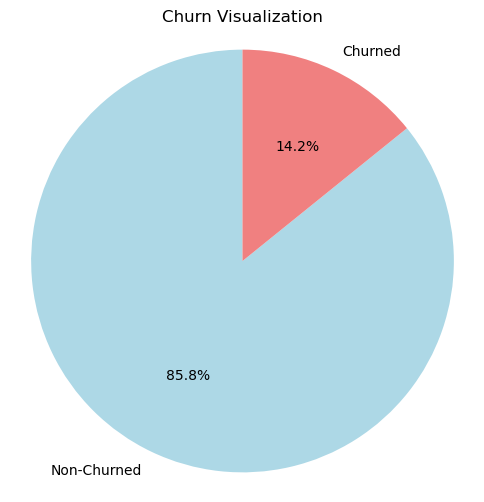

In [18]:
# Count the number of churned and non-churned customers
churn_counts = data2_encoded['churn_True'].value_counts()

# Create a pie chart to visualize the churn
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['Non-Churned', 'Churned'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Churn Visualization')
plt.axis('equal')
plt.show()

The data visualization shows the churn rate in the dataset. Most of the customers lie under the non-churned section at 85.8%, while only 14.2% of customers had churned.This class imbalance can lead to biased prediction and inadequate representation of the churn class in the modeling process. This issue can be addressed usine SMOTE (Synthetic Minority Over-Sampling Technique).

In [21]:
#Adress churn class imbalance
from imblearn.over_sampling import SMOTE

# Separate features (X) and target variable (y)
X = data2_encoded.drop(columns=['churn_True'])
y = data2_encoded['churn_True']

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['churn_True'] = y_resampled
y_resampled.value_counts()

churn_True
0    2818
1    2818
Name: count, dtype: int64

In [22]:
print(X_resampled.shape)
print(y_resampled.shape)

(5636, 6)
(5636,)
